<a href="https://colab.research.google.com/github/malyokhova/Physics/blob/modeling1/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Волновая функция

In [ ]:
def psi(x):
    if abs(x) > a/2:
        return 0
    else:
        return -alpha * abs(x) + beta

Введем ширину ямы и начальные параметры

In [ ]:
a = float(input("Введите ширину ямы a: "))
dt = 0.001
num_points = 100  # количество базисов

Введите ширину ямы a: 1


Вычислим значения коэффициенты альфа и бетта из условия нормировки

In [ ]:
alpha = 2/a * math.sqrt(3/a)
beta = math.sqrt(3/a)

Вычислим волновую функцию в начальный момент времени

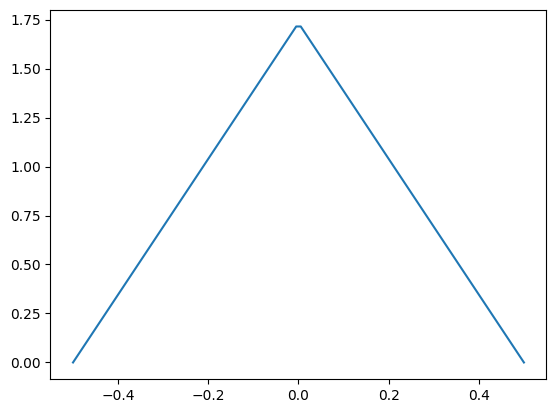

In [ ]:
x = np.linspace(-a/2, a/2, num_points) # создаем массив координат

# Вычисляем волновую функцию в начальный момент времени
psi_init = np.zeros(num_points)
plt.plot(x, [psi(i) for i in x])

Вычислим коэффициенты в суперпозиции. Для этого воспользуемся численным методом интегрирования - методом Симпсона

In [ ]:
def simpsons_formula(f, a):
    h = 0.2
    n = int(a / h + 1)
    f_sum = 0.0
    for i in range(1, n):
        x_0 = a + h * (i - 1)
        x_1 = a + h * (i - 0.5)
        x_2 = a + h * i
        f_sum += f(x_0) + 4 * f(x_1) + f(x_2)
    return (h / 6) * f_sum

In [ ]:
C = []
for i in range(num_points):
    f = lambda x: math.sqrt(2/a) * math.cos((math.pi * i * x) / a) * (-alpha * x + beta)
    C.append(simpsons_formula(f, a))
# print(len(C))
# print("C = ", C)

Вычислим волновую функцию для разных моментов времени

<ipython-input-10-9dccc2250552>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  psi_square[i] = (C[i] * math.cos(E(n) * t / h_bar) * psi(x[i]) + 1j * C[i] * math.sin(E(n) * t / h_bar) * psi(x[i])) *(C[i] * math.cos(E(n) * t / h_bar) * psi(x[i]) - 1j * C[i] * math.sin(E(n) * t / h_bar) * psi(x[i]))


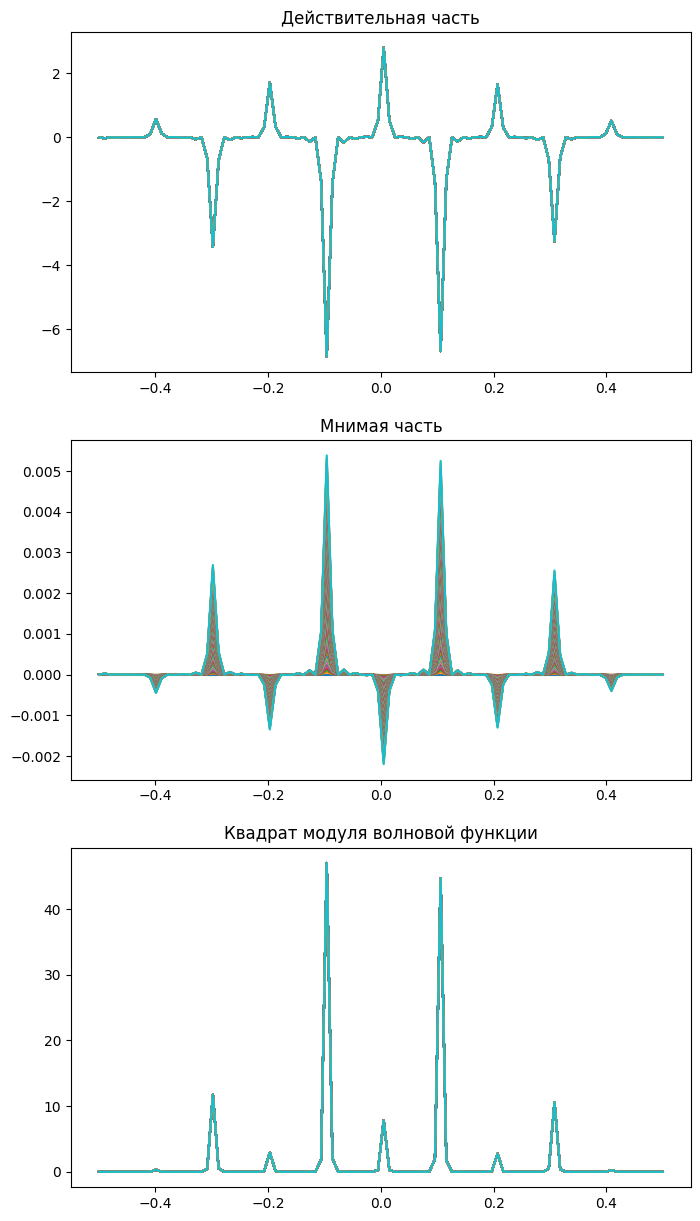

In [ ]:
# Вычисляем волновую функцию для разных моментов времени
h = 1 # 6.62 * 1e-34
h_bar = h / (2 * math.pi)
m = 1 # 9.1 * 1e-31
E = lambda n: 1 / (2 * m) * math.pow(n * math.pi * h_bar / a, 2)
plt.figure(figsize=(8,15))
for t in np.linspace(0, dt, num_points):
    n = 1
    psi_square = np.zeros(num_points)
    psi_real = np.zeros(num_points)
    psi_imaginary = np.zeros(num_points)
    for i in range(num_points):
        psi_real[i] = C[i] * math.cos(E(n) * t / h_bar) * psi(x[i])
        psi_imaginary[i] = - C[i] * math.sin(E(n) * t / h_bar) * psi(x[i])
        psi_square[i] = (C[i] * math.cos(E(n) * t / h_bar) * psi(x[i]) + 1j * C[i] * math.sin(E(n) * t / h_bar) * psi(x[i])) *(C[i] * math.cos(E(n) * t / h_bar) * psi(x[i]) - 1j * C[i] * math.sin(E(n) * t / h_bar) * psi(x[i]))
    plt.subplot(3, 1, 1)
    plt.title("Действительная часть")
    plt.plot(x, psi_real)
    plt.subplot(3, 1, 2)
    plt.title("Мнимая часть")
    plt.plot(x, psi_imaginary)
    plt.subplot(3, 1, 3)
    plt.title("Квадрат модуля волновой функции")
    plt.plot(x, psi_square)